In [ ]:
import sqlite3 #sqlite 모듈 로딩
#sqlite 데이터베이스에 접속
conn=sqlite3.connect('d:/data/db/ontime.db')
#레코드셋 탐색을 위한 커서 객체 생성
cursor=conn.cursor()
#sql 명령어 실행, limit 레코드수 제한
cursor.execute('select * from ontime limit 5')
#커서가 가리키는 모든 내용을 리스트로 저장
rows = cursor.fetchall()
for row in rows:
    print(row)

#커서 닫기
cursor.close()
#db 접속 종료
conn.close()

In [2]:
import sqlite3
#db 접속
conn = sqlite3.connect('d:/data/db/ontime.db')
#커서 생성
cursor = conn.cursor()
#sql 명령어 실행, 항공사별 출발지연시간 평균값(내림차순)
cursor.execute('''select uniquecarrier, avg(depdelay)
from ontime
group by uniquecarrier
order by avg(depdelay) desc''')
#커서가 가리키는 모든 내용을 리스트로 저장
rows = cursor.fetchall()
for row in rows:
    print(row)
#커서 닫기
cursor.close()
#db 접속 해제
conn.close()

('UA', 13.784372045426737)
('CO', 13.023581444438861)
('AA', 12.899916513056201)
('B6', 12.447679903718171)
('EV', 11.711389111645728)
('YV', 11.572015847487545)
('OH', 11.16054087152783)
('XE', 11.093709113241301)
('MQ', 10.29978622071234)
('WN', 10.276262862449386)
('FL', 9.183920300820837)
('DL', 7.887967410954327)
('OO', 7.2952999070807305)
('AS', 6.752723325965242)
('9E', 6.5856228642909445)
('NW', 6.409786223004613)
('F9', 5.901056786616821)
('US', 5.635456327203702)
('HA', 0.4510561899524472)
('AQ', -1.3902564102564103)


In [38]:
conn = sqlite3.connect('d:/data/db/ontime.db')
cursor=conn.cursor()
cursor.execute('''
select uniquecarrier, avg(arrdelay)
from ontime
group by uniquecarrier
order by avg(arrdelay) desc''')
rows = cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

('AA', 12.202853434950445)
('OH', 11.404110178283158)
('YV', 11.322566979170753)
('UA', 11.001550560048052)
('B6', 10.859381613638567)
('CO', 10.809820575966226)
('XE', 10.320298523403915)
('EV', 10.00033146217589)
('MQ', 9.496970610952266)
('FL', 8.988157472371256)
('DL', 7.716164635751918)
('NW', 7.293465879672776)
('OO', 6.43893863978179)
('F9', 6.084135669681085)
('WN', 5.115703380225903)
('AS', 4.721360405553864)
('9E', 3.987490846961191)
('US', 2.800998260539828)
('HA', 1.2518519716624075)
('AQ', -2.8708974358974357)


In [39]:
x = list(range(1,21))
y= []
for row in rows:
    y.append(row[1])
print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[12.202853434950445, 11.404110178283158, 11.322566979170753, 11.001550560048052, 10.859381613638567, 10.809820575966226, 10.320298523403915, 10.00033146217589, 9.496970610952266, 8.988157472371256, 7.716164635751918, 7.293465879672776, 6.43893863978179, 6.084135669681085, 5.115703380225903, 4.721360405553864, 3.987490846961191, 2.800998260539828, 1.2518519716624075, -2.8708974358974357]


1     12.202853
2     11.404110
3     11.322567
4     11.001551
5     10.859382
6     10.809821
7     10.320299
8     10.000331
9      9.496971
10     8.988157
11     7.716165
12     7.293466
13     6.438939
14     6.084136
15     5.115703
16     4.721360
17     3.987491
18     2.800998
19     1.251852
20    -2.870897
dtype: float64


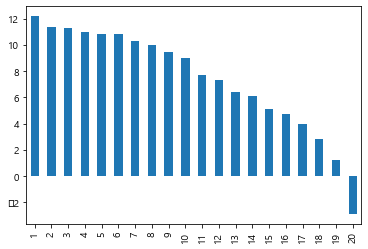

In [43]:
import pandas as pd
%matplotlib inline
s1=pd.Series(y, index=x)
print(s1)
s1.plot(kind='bar')

In [17]:
#출발지연시간 월별 집계
import sqlite3

conn=sqlite3.connect('d:/data/db/ontime.db')
cursor=conn.cursor()
cursor.execute('''
select month,count(*) from ontime
where depdelay>0
group by month''')
rows=cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(1, 265256)
(2, 273361)
(3, 288152)
(4, 231219)
(5, 226843)
(6, 281945)
(7, 264230)
(8, 241184)
(9, 156974)
(10, 165590)
(11, 161485)
(12, 280981)


In [18]:
x = list(range(1,13)) #1~12
y = [] #지연횟수를 저장할 결과 리스트
for row in rows:
    y.append(row[1])
    
print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[265256, 273361, 288152, 231219, 226843, 281945, 264230, 241184, 156974, 165590, 161485, 280981]


1     265256
2     273361
3     288152
4     231219
5     226843
6     281945
7     264230
8     241184
9     156974
10    165590
11    161485
12    280981
dtype: int64


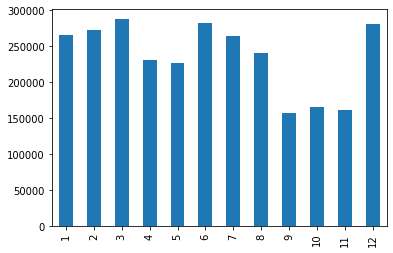

In [20]:
import pandas as pd #판다스 패키지 로딩
#그래프 출력 옵션 활성화
#매직명령어 - %로 시작하는 명령어
%matplotlib inline 
# 시리즈(그래프 출력을 위한 1차원 데이터), index x축의 라벨
s1=pd.Series(y, index=x)
print(s1)
s1.plot(kind='bar') #막대 그래프로 출력
#s1.plot

In [21]:
#요일별 평균지연시간
import sqlite3
#db 접속
conn = sqlite3.connect('d:/data/db/ontime.db')
#레코드셋 탐색을 위한 커서 생성
cursor=conn.cursor()
#sql 명령어를 실행시킴
cursor.execute('''select dayofweek, avg(arrdelay)
from ontime
group by dayofweek
''')
#커서가 가리키는 모든 레코드셋을 리스트로 저장
rows=cursor.fetchall()
for row in rows:
    print(row)
#커서닫기, db접속 해제
cursor.close()
conn.close()

(1, 8.030254747872275)
(2, 7.29232332960935)
(3, 6.379804071503802)
(4, 8.246549198623555)
(5, 10.675214410055972)
(6, 5.682499626837823)
(7, 9.294087238339747)


In [23]:
x =['월','화','수','목','금','토','일']
y=[]

for row in rows:
    y.append(row[1])
    
print(x)
print(y)


['월', '화', '수', '목', '금', '토', '일']
[8.030254747872275, 7.29232332960935, 6.379804071503802, 8.246549198623555, 10.675214410055972, 5.682499626837823, 9.294087238339747]


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

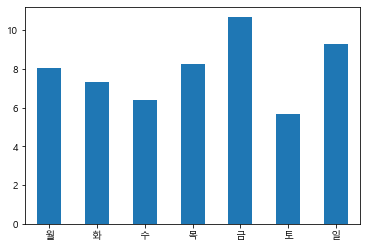

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#한글 처리
from matplotlib import rc,font_manager
#변경할 폰트
font_name=font_manager.FontProperties(
fname='c:/windows/fonts/malgun.ttf').get_name()
#폰트 설정
rc('font',family=font_name)


#그래프 출력을 위핸 시리즈 타입으로 변환
s1=pd.Series(y,index=x)
s1.plot(kind='bar') #막대 그래프
plt.xticks(rotation=0)